### Import

In [1]:

!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import random
import os
from datetime import datetime
import sys
from catboost import CatBoostRegressor,Pool
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
import seaborn as sns

In [3]:
from google.colab import drive
from importlib import reload

drive.mount('/content/gdrive',force_remount = True)


Mounted at /content/gdrive


### utils module import

In [4]:
if 'gdrive.MyDrive.utils' not in sys.modules:
  import  gdrive.MyDrive.utils as utils
else:
  print("utils reload")
  reload(utils)

if 'gdrive.MyDrive.data_EDA' not in sys.modules:
  import gdrive.MyDrive.data_EDA as EDA
else:
  print('eda module reload')
  reload(EDA)

version 1


In [5]:
project_name = '가격예측'

### util 설정

In [6]:
utils.seed_everything(311)
utils.set_dir(project_name)

현재 폴더 :  /content/gdrive/MyDrive/data/가격예측
데이터 위치 :  /content/gdrive/MyDrive/data/가격예측/sample_data
submission 위치 :  /content/gdrive/MyDrive/data/가격예측/sample_data


### Load Data

In [7]:
train, test, submission = utils.get_data()
train.head(5)
print(train.columns)
print(test.columns)


load from train :  /content/gdrive/MyDrive/data/가격예측/sample_data/train.csv
load from train :  /content/gdrive/MyDrive/data/가격예측/sample_data/test.csv
load from submission :  /content/gdrive/MyDrive/data/가격예측/sample_data/sample_submission.csv
Index(['ID', 'timestamp', 'item', 'corporation', 'location', 'supply(kg)',
       'price(원/kg)'],
      dtype='object')
Index(['ID', 'timestamp', 'item', 'corporation', 'location'], dtype='object')


<Axes: xlabel='timestamp', ylabel='price(원/kg)'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


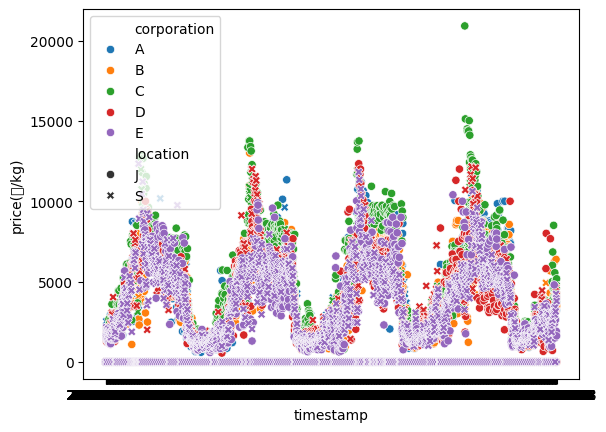

In [159]:
group = train[train['item']=="TG"]
sns.scatterplot(y='price(원/kg)',x='timestamp', data=group, hue='corporation',style='location')

<Axes: xlabel='timestamp', ylabel='price(원/kg)'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


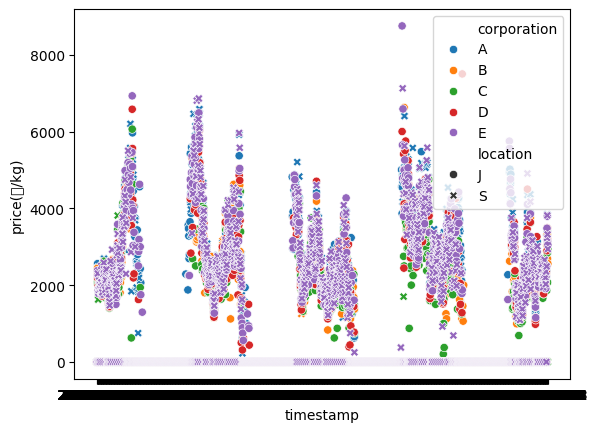

In [160]:
group = train[train['item']=="BC"]
sns.scatterplot(y='price(원/kg)',x='timestamp', data=group, hue='corporation',style='location')

<Axes: xlabel='timestamp', ylabel='price(원/kg)'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


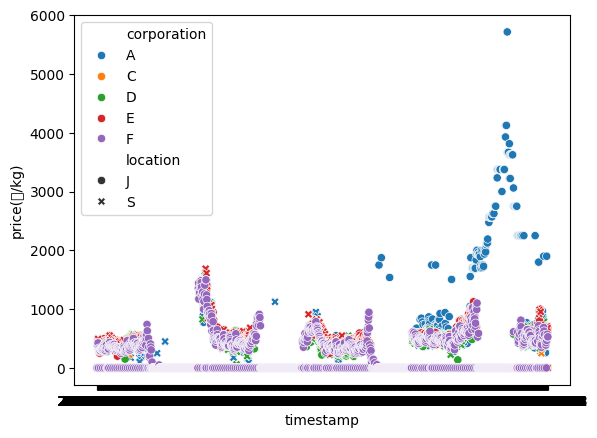

In [161]:
group = train[train['item']=="RD"]
sns.scatterplot(y='price(원/kg)',x='timestamp', data=group, hue='corporation',style='location')

<Axes: xlabel='timestamp', ylabel='price(원/kg)'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


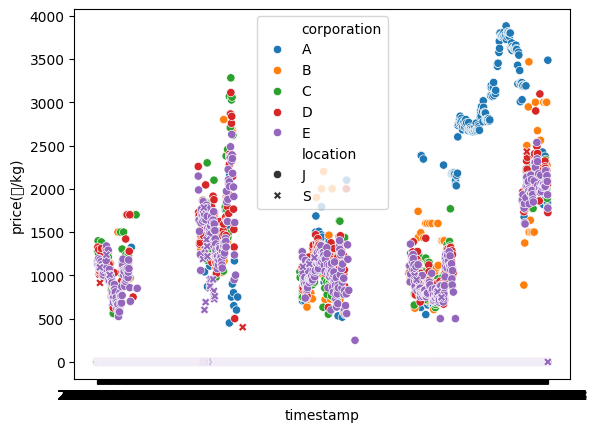

In [162]:
group = train[train['item']=="CR"]
sns.scatterplot(y='price(원/kg)',x='timestamp', data=group, hue='corporation',style='location')

<Axes: xlabel='timestamp', ylabel='price(원/kg)'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


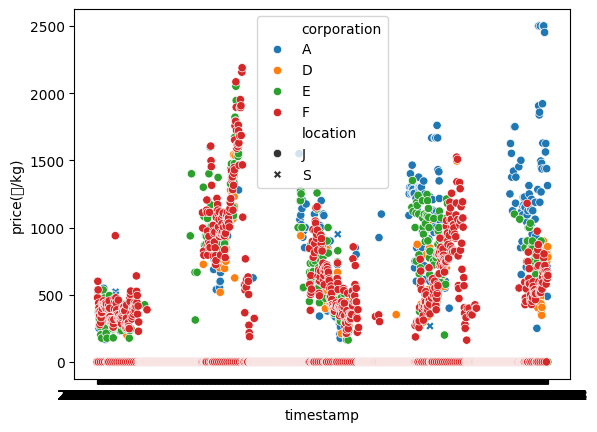

In [163]:
group = train[train['item']=="CB"]
sns.scatterplot(y='price(원/kg)',x='timestamp', data=group, hue='corporation',style='location')

In [8]:
train.head(5)

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0


In [52]:
test.head(5)

,ID,timestamp,item,corporation,location
0,TG_A_J_20230304,2023-03-04,TG,A,J
1,TG_A_J_20230305,2023-03-05,TG,A,J
2,TG_A_J_20230306,2023-03-06,TG,A,J
3,TG_A_J_20230307,2023-03-07,TG,A,J
4,TG_A_J_20230308,2023-03-08,TG,A,J


In [66]:
def drop_cols(train,test):
  train_x = train.drop(columns=['ID','price(원/kg)','supply(kg)'])
  test_x = test.drop(columns=['ID'])
  return train_x, test_x


In [71]:
def split_times(train_x,test_x):
  split_time = pd.to_datetime(train_x['timestamp'],format="%Y-%m-%d")
  print(len(train_x),len(split_time))
  train_x['year'] = split_time.dt.year
  train_x['month'] = split_time.dt.month
  train_x['day'] = split_time.dt.day
  train_x.drop(columns=['timestamp'], inplace=True)
  # print(test_x.head())
  split_time = pd.to_datetime(test_x['timestamp'],format="%Y-%m-%d")
  test_x['year'] = split_time.dt.year
  test_x['month'] = split_time.dt.month
  test_x['day'] = split_time.dt.day
  test_x.drop(columns=['timestamp'], inplace=True)
  # print(test_x.head())
  return train_x, test_x

In [126]:
def groupby_item(train_x,train_y, test_x):
  items = train_x['item'].unique()
  new_train_x = {}
  new_test_idx = {}
  new_train_y = {}
  for item in items:
    new_train_x[item] = train_x[train_x['item']==item].drop(columns=['item'])
    new_train_y[item] = train_y[train_x['item']==item]
    new_test_idx[item] = test_x['item']==item

  test_x.drop(columns=['item'],inplace=True)
  return new_train_x,new_train_y, new_test_idx

In [127]:
def data_processing(train,test, use_valid=False):
  train_y = train[['price(원/kg)']]
  train_x, test_x = drop_cols(train,test)
  train_x, test_x = split_times(train_x,test_x)
  train_x, train_y, test_idx = groupby_item(train_x,train_y, test_x)
  return train_x, train_y, test_x, test_idx


### Model1 : group by item
955.4310684684
1086.0504600442


In [130]:
train, test, submission = utils.get_data()
# print(test.head(5))
train_x, train_y, test_x, test_idx = data_processing(train,test)
print(train_x['TG'].head())
print(test_x.head())
print(test_idx['TG'].head())

cat_features = ['corporation', 'location']

load from train :  /content/gdrive/MyDrive/data/가격예측/sample_data/train.csv
load from train :  /content/gdrive/MyDrive/data/가격예측/sample_data/test.csv
load from submission :  /content/gdrive/MyDrive/data/가격예측/sample_data/sample_submission.csv
59397 59397
    timestamp item corporation location
0  2023-03-04   TG           A        J
1  2023-03-05   TG           A        J
2  2023-03-06   TG           A        J
3  2023-03-07   TG           A        J
4  2023-03-08   TG           A        J
  item corporation location  year  month  day
0   TG           A        J  2023      3    4
1   TG           A        J  2023      3    5
2   TG           A        J  2023      3    6
3   TG           A        J  2023      3    7
4   TG           A        J  2023      3    8
  corporation location  year  month  day
0           A        J  2019      1    1
1           A        J  2019      1    2
2           A        J  2019      1    3
3           A        J  2019      1    4
4           A        J  20

0:	learn: 2585.7309762	total: 8.13ms	remaining: 24.4s
500:	learn: 1907.2927881	total: 4.83s	remaining: 24.1s
1000:	learn: 1774.1938887	total: 7.59s	remaining: 15.2s
1500:	learn: 1680.5695334	total: 10.4s	remaining: 10.4s
2000:	learn: 1602.9077488	total: 13.3s	remaining: 6.64s
2500:	learn: 1541.4799320	total: 18.3s	remaining: 3.64s
2999:	learn: 1485.8207832	total: 21.2s	remaining: 0us


<Axes: xlabel='day'>

0:	learn: 568.6751430	total: 6.41ms	remaining: 19.2s
500:	learn: 326.5492914	total: 2.41s	remaining: 12s
1000:	learn: 287.9936384	total: 8.93s	remaining: 17.8s
1500:	learn: 263.3265844	total: 11.7s	remaining: 11.7s
2000:	learn: 244.7262746	total: 14s	remaining: 6.97s
2500:	learn: 230.2294045	total: 16.2s	remaining: 3.24s
2999:	learn: 217.8646395	total: 18.5s	remaining: 0us


<Axes: xlabel='day'>

0:	learn: 318.2982966	total: 4.49ms	remaining: 13.5s
500:	learn: 187.6263384	total: 2.35s	remaining: 11.7s
1000:	learn: 167.9470736	total: 5.29s	remaining: 10.6s
1500:	learn: 155.0103399	total: 6.99s	remaining: 6.98s
2000:	learn: 145.0463219	total: 8.72s	remaining: 4.35s
2500:	learn: 137.2255100	total: 10.4s	remaining: 2.08s
2999:	learn: 130.0438790	total: 12.2s	remaining: 0us


<Axes: xlabel='day'>

0:	learn: 323.3158531	total: 6.11ms	remaining: 18.3s
500:	learn: 202.8790643	total: 2.88s	remaining: 14.3s
1000:	learn: 186.0754586	total: 6.9s	remaining: 13.8s
1500:	learn: 173.7474441	total: 9.39s	remaining: 9.38s
2000:	learn: 164.4859269	total: 11.9s	remaining: 5.95s
2500:	learn: 157.5579392	total: 14.4s	remaining: 2.88s
2999:	learn: 150.2382976	total: 19s	remaining: 0us


<Axes: xlabel='day'>

0:	learn: 1229.3746777	total: 6.75ms	remaining: 20.3s
500:	learn: 701.6367908	total: 2.6s	remaining: 13s
1000:	learn: 641.1429882	total: 5.11s	remaining: 10.2s
1500:	learn: 599.0581624	total: 7.68s	remaining: 7.67s
2000:	learn: 569.1213880	total: 11.4s	remaining: 5.71s
2500:	learn: 542.8083945	total: 15s	remaining: 2.98s
2999:	learn: 522.8685642	total: 17.6s	remaining: 0us


<Axes: xlabel='day'>

,ID,answer
0,TG_A_J_20230304,3196.763309
1,TG_A_J_20230305,1758.757446
2,TG_A_J_20230306,2153.158168
3,TG_A_J_20230307,3816.435216
4,TG_A_J_20230308,3503.120747


,answer
count,1092.000000
mean,1608.073252
std,1671.230763
min,0.000000
25%,224.863070
50%,986.938088
75%,2497.357739
max,8023.098667


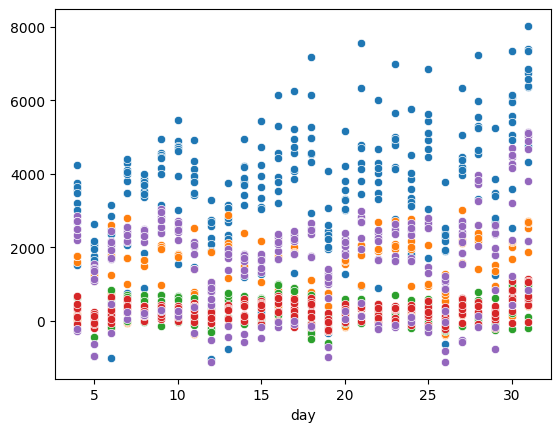

In [144]:
for item in train_x.keys():
  train_pool = Pool(train_x[item], train_y[item], cat_features=cat_features)
  cat_model = CatBoostRegressor(verbose=500,iterations=3000, learning_rate=0.3)
  cat_model.fit(train_pool)
  test_pool = Pool(test_x[test_idx[item]], cat_features=cat_features)
  preds = cat_model.predict(test_pool)
  submission['answer'][test_idx[item]] = preds

  # x=test_x[test_idx[item]]['month']*32 + test_x[test_idx[item]]['day']
  x= test_x[test_idx[item]]['day']
  display(sns.scatterplot(y=preds, x=x))

submission['answer'][submission['answer']<0] = 0
display(submission.head(5))
display(submission.describe())
submission.to_csv('/content/gdrive/MyDrive/data/가격예측/sample_data/groupby0.3.csv', index=False)

### Model3 : groupby = corporation추가
955.4310684684
1086.0504600442


In [198]:
def drop_cols(train,test):
  train_x = train.drop(columns=['ID','price(원/kg)','supply(kg)'])
  test_x = test.drop(columns=['ID'])
  return train_x, test_x


In [199]:
def split_times(train_x,test_x):
  split_time = pd.to_datetime(train_x['timestamp'],format="%Y-%m-%d")
  print(len(train_x),len(split_time))
  train_x['year'] = split_time.dt.year
  train_x['month'] = split_time.dt.month
  train_x['day'] = split_time.dt.day
  train_x.drop(columns=['timestamp'], inplace=True)
  # print(test_x.head())
  split_time = pd.to_datetime(test_x['timestamp'],format="%Y-%m-%d")
  test_x['year'] = split_time.dt.year
  test_x['month'] = split_time.dt.month
  test_x['day'] = split_time.dt.day
  test_x.drop(columns=['timestamp'], inplace=True)
  # print(test_x.head())
  return train_x, test_x

In [200]:
from itertools import product
def groupby_item_corp(train_x,train_y, test_x):
  items = train_x['item'].unique()
  corps = train_x['corporation'].unique()
  new_train_x = {}
  new_test_idx = {}
  new_train_y = {}
  for item,corp in product(items,corps):
    print(item,corp)
    new_train_x[(item,corp)] = train_x[(train_x['item']==item) & (train_x['corporation']==corp)].drop(columns=['item','corporation'])
    new_train_y[(item,corp)] = train_y[(train_x['item']==item) & (train_x['corporation']==corp)]
    new_test_idx[(item,corp)] = (test_x['item']==item) & (test_x['corporation']==corp)

  test_x.drop(columns=['item','corporation'],inplace=True)
  return new_train_x,new_train_y, new_test_idx

In [201]:
def data_processing(train,test, use_valid=False):
  train_y = train[['price(원/kg)']]
  train_x, test_x = drop_cols(train,test)
  train_x, test_x = split_times(train_x,test_x)
  train_x, train_y, test_idx = groupby_item_corp(train_x,train_y, test_x)
  return train_x, train_y, test_x, test_idx


In [202]:
train, test, submission = utils.get_data()
# print(test.head(5))
train_x, train_y, test_x, test_idx = data_processing(train,test)
print(train_x)
print(train_x[('TG','A')].head())

cat_features = ['location']

load from train :  /content/gdrive/MyDrive/data/가격예측/sample_data/train.csv
load from train :  /content/gdrive/MyDrive/data/가격예측/sample_data/test.csv
load from submission :  /content/gdrive/MyDrive/data/가격예측/sample_data/sample_submission.csv
59397 59397
TG A
TG B
TG C
TG D
TG E
TG F
CR A
CR B
CR C
CR D
CR E
CR F
CB A
CB B
CB C
CB D
CB E
CB F
RD A
RD B
RD C
RD D
RD E
RD F
BC A
BC B
BC C
BC D
BC E
BC F
{('TG', 'A'):      location  year  month  day
0           J  2019      1    1
1           J  2019      1    2
2           J  2019      1    3
3           J  2019      1    4
4           J  2019      1    5
...       ...   ...    ...  ...
3041        S  2023      2   27
3042        S  2023      2   28
3043        S  2023      3    1
3044        S  2023      3    2
3045        S  2023      3    3

[3046 rows x 4 columns], ('TG', 'B'):      location  year  month  day
3046        J  2019      1    1
3047        J  2019      1    2
3048        J  2019      1    3
3049        J  2019      1    4


('TG', 'A')
0:	learn: 2708.0401264	total: 33.9ms	remaining: 8m 28s
1500:	learn: 1426.5571374	total: 1.8s	remaining: 16.2s
3000:	learn: 1179.2216827	total: 3.44s	remaining: 13.7s
4500:	learn: 1037.2446308	total: 5.42s	remaining: 12.6s
6000:	learn: 938.2829479	total: 6.85s	remaining: 10.3s
7500:	learn: 868.5229387	total: 7.89s	remaining: 7.88s
9000:	learn: 813.5395455	total: 8.95s	remaining: 5.97s
10500:	learn: 771.4692759	total: 10s	remaining: 4.29s
12000:	learn: 736.1859238	total: 11s	remaining: 2.76s
13500:	learn: 706.8318191	total: 12s	remaining: 1.33s
14999:	learn: 681.7417013	total: 13s	remaining: 0us


<ipython-input-203-5991280dc300>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['answer'][test_idx[item]] = preds


<Axes: xlabel='day'>

('TG', 'B')
0:	learn: 2639.7471895	total: 5.4ms	remaining: 1m 20s
1500:	learn: 1323.1722813	total: 1.08s	remaining: 9.77s
3000:	learn: 1052.2151243	total: 2.27s	remaining: 9.06s
4500:	learn: 890.7006313	total: 4.49s	remaining: 10.5s
6000:	learn: 788.0754375	total: 6.13s	remaining: 9.19s
7500:	learn: 715.5477992	total: 7.19s	remaining: 7.19s
9000:	learn: 659.4887969	total: 8.21s	remaining: 5.47s
10500:	learn: 616.2471139	total: 9.24s	remaining: 3.96s
12000:	learn: 578.3048770	total: 10.3s	remaining: 2.57s
13500:	learn: 547.4049618	total: 11.3s	remaining: 1.26s
14999:	learn: 518.9802610	total: 12.4s	remaining: 0us


<Axes: xlabel='day'>

('TG', 'C')
0:	learn: 3023.1050829	total: 594us	remaining: 8.91s
1500:	learn: 1511.9154980	total: 1.05s	remaining: 9.49s
3000:	learn: 1226.2479933	total: 2.08s	remaining: 8.33s
4500:	learn: 1051.2544756	total: 4.17s	remaining: 9.73s
6000:	learn: 942.6884764	total: 6.5s	remaining: 9.75s
7500:	learn: 862.0334199	total: 7.57s	remaining: 7.57s
9000:	learn: 796.8519976	total: 8.62s	remaining: 5.75s
10500:	learn: 746.8515014	total: 9.67s	remaining: 4.14s
12000:	learn: 704.7641382	total: 10.7s	remaining: 2.67s
13500:	learn: 668.5246514	total: 11.7s	remaining: 1.3s
14999:	learn: 635.7396376	total: 12.8s	remaining: 0us


<Axes: xlabel='day'>

('TG', 'D')
0:	learn: 2624.9369025	total: 653us	remaining: 9.81s
1500:	learn: 1439.0344137	total: 1.06s	remaining: 9.54s
3000:	learn: 1182.4576164	total: 2.15s	remaining: 8.6s
4500:	learn: 1041.8564986	total: 4.43s	remaining: 10.3s
6000:	learn: 950.4891327	total: 6.14s	remaining: 9.21s
7500:	learn: 885.2725811	total: 7.21s	remaining: 7.21s
9000:	learn: 832.2057819	total: 8.27s	remaining: 5.51s
10500:	learn: 787.4565528	total: 9.34s	remaining: 4s
12000:	learn: 748.4886654	total: 10.4s	remaining: 2.6s
13500:	learn: 714.6023483	total: 11.4s	remaining: 1.27s
14999:	learn: 687.2905279	total: 12.6s	remaining: 0us


<Axes: xlabel='day'>

('TG', 'E')
0:	learn: 2452.7473526	total: 684us	remaining: 10.3s
1500:	learn: 1378.0824714	total: 1.06s	remaining: 9.5s
3000:	learn: 1152.8946116	total: 2.23s	remaining: 8.91s
4500:	learn: 1021.4667572	total: 4.5s	remaining: 10.5s
6000:	learn: 932.5416965	total: 6.16s	remaining: 9.24s
7500:	learn: 864.4490273	total: 7.24s	remaining: 7.24s
9000:	learn: 810.9788710	total: 8.32s	remaining: 5.54s
10500:	learn: 766.3935516	total: 9.41s	remaining: 4.03s
12000:	learn: 727.8468995	total: 10.5s	remaining: 2.62s
13500:	learn: 695.5144700	total: 11.6s	remaining: 1.28s
14999:	learn: 667.2731998	total: 12.6s	remaining: 0us


<Axes: xlabel='day'>

('TG', 'F')
('CR', 'A')
0:	learn: 988.0125377	total: 594us	remaining: 8.92s
1500:	learn: 283.0373443	total: 728ms	remaining: 6.55s
3000:	learn: 166.0179591	total: 1.4s	remaining: 5.59s
4500:	learn: 118.0902832	total: 2.11s	remaining: 4.92s
6000:	learn: 92.8495784	total: 3.43s	remaining: 5.14s
7500:	learn: 77.6889749	total: 4.7s	remaining: 4.7s
9000:	learn: 66.1174905	total: 5.8s	remaining: 3.86s
10500:	learn: 56.8108221	total: 6.45s	remaining: 2.76s
12000:	learn: 49.5453723	total: 7.1s	remaining: 1.77s
13500:	learn: 44.1660805	total: 7.75s	remaining: 860ms
14999:	learn: 39.5241059	total: 8.43s	remaining: 0us


<Axes: xlabel='day'>

('CR', 'B')
0:	learn: 474.4591091	total: 564us	remaining: 8.46s
1500:	learn: 158.8925630	total: 699ms	remaining: 6.29s
3000:	learn: 103.0640395	total: 1.39s	remaining: 5.56s
4500:	learn: 71.6260604	total: 2.07s	remaining: 4.84s
6000:	learn: 52.3992119	total: 2.71s	remaining: 4.07s
7500:	learn: 40.0579097	total: 3.38s	remaining: 3.38s
9000:	learn: 31.2847094	total: 4.03s	remaining: 2.69s
10500:	learn: 25.0399198	total: 4.66s	remaining: 2s
12000:	learn: 20.0897192	total: 5.32s	remaining: 1.33s
13500:	learn: 16.5385935	total: 6.08s	remaining: 675ms
14999:	learn: 13.8775354	total: 7.26s	remaining: 0us


<Axes: xlabel='day'>

('CR', 'C')
0:	learn: 550.7230875	total: 5.33ms	remaining: 1m 19s
1500:	learn: 194.3125221	total: 1.23s	remaining: 11.1s
3000:	learn: 131.1258767	total: 2.3s	remaining: 9.18s
4500:	learn: 97.4789195	total: 2.96s	remaining: 6.91s
6000:	learn: 77.0056607	total: 3.63s	remaining: 5.44s
7500:	learn: 61.8268804	total: 4.29s	remaining: 4.29s
9000:	learn: 50.8451348	total: 4.96s	remaining: 3.3s
10500:	learn: 42.6151199	total: 5.58s	remaining: 2.39s
12000:	learn: 36.0501819	total: 6.23s	remaining: 1.56s
13500:	learn: 30.9150037	total: 6.88s	remaining: 765ms
14999:	learn: 27.1619116	total: 7.51s	remaining: 0us


<Axes: xlabel='day'>

('CR', 'D')
0:	learn: 493.9401655	total: 587us	remaining: 8.81s
1500:	learn: 149.8300115	total: 1.03s	remaining: 9.32s
3000:	learn: 107.4187572	total: 2.07s	remaining: 8.29s
4500:	learn: 86.2134310	total: 3.1s	remaining: 7.24s
6000:	learn: 72.7330289	total: 5.25s	remaining: 7.88s
7500:	learn: 63.4018791	total: 7.17s	remaining: 7.17s
9000:	learn: 56.7780203	total: 8.22s	remaining: 5.48s
10500:	learn: 51.5296308	total: 9.28s	remaining: 3.98s
12000:	learn: 47.4172126	total: 10.3s	remaining: 2.57s
13500:	learn: 43.7744864	total: 11.3s	remaining: 1.25s
14999:	learn: 41.1436906	total: 12.3s	remaining: 0us


<Axes: xlabel='day'>

('CR', 'E')
0:	learn: 468.5843304	total: 619us	remaining: 9.3s
1500:	learn: 147.4759098	total: 1.08s	remaining: 9.77s
3000:	learn: 106.2276659	total: 2.11s	remaining: 8.44s
4500:	learn: 84.0103992	total: 3.14s	remaining: 7.32s
6000:	learn: 70.6854970	total: 4.98s	remaining: 7.47s
7500:	learn: 61.8340708	total: 7.2s	remaining: 7.19s
9000:	learn: 55.4545977	total: 8.22s	remaining: 5.48s
10500:	learn: 50.4519326	total: 9.25s	remaining: 3.96s
12000:	learn: 46.5521660	total: 10.3s	remaining: 2.57s
13500:	learn: 43.4603543	total: 11.3s	remaining: 1.25s
14999:	learn: 40.9702801	total: 12.3s	remaining: 0us


<Axes: xlabel='day'>

('CR', 'F')
('CB', 'A')
0:	learn: 312.5829914	total: 758us	remaining: 11.4s
1500:	learn: 118.0336826	total: 1.09s	remaining: 9.78s
3000:	learn: 90.7995329	total: 2.13s	remaining: 8.51s
4500:	learn: 75.6331543	total: 3.17s	remaining: 7.39s
6000:	learn: 65.3386091	total: 4.88s	remaining: 7.32s
7500:	learn: 58.0544683	total: 7.26s	remaining: 7.26s
9000:	learn: 52.4565630	total: 8.44s	remaining: 5.62s
10500:	learn: 48.3701897	total: 9.54s	remaining: 4.09s
12000:	learn: 45.1251691	total: 10.6s	remaining: 2.66s
13500:	learn: 42.4107524	total: 11.7s	remaining: 1.3s
14999:	learn: 40.1706954	total: 12.8s	remaining: 0us


<Axes: xlabel='day'>

('CB', 'B')
('CB', 'C')
('CB', 'D')
0:	learn: 249.7799500	total: 562us	remaining: 8.44s
1500:	learn: 77.7562207	total: 712ms	remaining: 6.41s
3000:	learn: 48.4353262	total: 1.41s	remaining: 5.64s
4500:	learn: 34.0697080	total: 2.04s	remaining: 4.77s
6000:	learn: 25.8087069	total: 2.72s	remaining: 4.08s
7500:	learn: 20.5288512	total: 3.39s	remaining: 3.39s
9000:	learn: 16.8899393	total: 4.67s	remaining: 3.12s
10500:	learn: 13.9104978	total: 6.08s	remaining: 2.61s
12000:	learn: 12.1497963	total: 7.25s	remaining: 1.81s
13500:	learn: 10.4345741	total: 7.93s	remaining: 881ms
14999:	learn: 9.0221442	total: 8.56s	remaining: 0us


<Axes: xlabel='day'>

('CB', 'E')
0:	learn: 363.4148570	total: 425us	remaining: 6.38s
1500:	learn: 116.5178983	total: 679ms	remaining: 6.1s
3000:	learn: 78.4740166	total: 1.33s	remaining: 5.32s
4500:	learn: 56.8301030	total: 2.09s	remaining: 4.88s
6000:	learn: 43.4052682	total: 2.83s	remaining: 4.25s
7500:	learn: 34.0706702	total: 3.53s	remaining: 3.53s
9000:	learn: 27.6890074	total: 4.22s	remaining: 2.81s
10500:	learn: 23.2991481	total: 4.92s	remaining: 2.11s
12000:	learn: 19.7408856	total: 5.58s	remaining: 1.39s
13500:	learn: 16.8479017	total: 6.22s	remaining: 690ms
14999:	learn: 14.5188143	total: 6.89s	remaining: 0us


<Axes: xlabel='day'>

('CB', 'F')
0:	learn: 378.8957242	total: 534us	remaining: 8.01s
1500:	learn: 111.2997260	total: 1.49s	remaining: 13.4s
3000:	learn: 73.1968054	total: 2.87s	remaining: 11.5s
4500:	learn: 52.9284742	total: 3.86s	remaining: 9.01s
6000:	learn: 41.9571524	total: 4.52s	remaining: 6.78s
7500:	learn: 35.0538984	total: 5.21s	remaining: 5.21s
9000:	learn: 30.2492101	total: 5.87s	remaining: 3.91s
10500:	learn: 26.4910207	total: 6.55s	remaining: 2.8s
12000:	learn: 23.0529363	total: 7.19s	remaining: 1.8s
13500:	learn: 20.4707428	total: 7.84s	remaining: 870ms
14999:	learn: 18.2740037	total: 8.48s	remaining: 0us


<Axes: xlabel='day'>

('RD', 'A')
0:	learn: 530.8342249	total: 18.8ms	remaining: 4m 41s
1500:	learn: 188.9084057	total: 1.11s	remaining: 10s
3000:	learn: 129.2439670	total: 2.18s	remaining: 8.71s
4500:	learn: 101.5042638	total: 3.21s	remaining: 7.49s
6000:	learn: 84.2831439	total: 4.78s	remaining: 7.17s
7500:	learn: 72.6978415	total: 7.1s	remaining: 7.1s
9000:	learn: 64.8038305	total: 8.38s	remaining: 5.58s
10500:	learn: 58.8777832	total: 9.44s	remaining: 4.04s
12000:	learn: 54.5334598	total: 10.5s	remaining: 2.63s
13500:	learn: 51.0969785	total: 11.5s	remaining: 1.28s
14999:	learn: 48.2986392	total: 12.6s	remaining: 0us


<Axes: xlabel='day'>

('RD', 'B')
('RD', 'C')
0:	learn: 46.9593210	total: 539us	remaining: 8.09s
1500:	learn: 10.4679966	total: 667ms	remaining: 6s
3000:	learn: 3.9057706	total: 1.32s	remaining: 5.29s
4500:	learn: 2.2743785	total: 1.98s	remaining: 4.63s
6000:	learn: 1.6128567	total: 2.64s	remaining: 3.96s
7500:	learn: 1.1759110	total: 3.3s	remaining: 3.3s
9000:	learn: 0.9286968	total: 4.18s	remaining: 2.78s
10500:	learn: 0.7343954	total: 5.31s	remaining: 2.27s
12000:	learn: 0.6018529	total: 6.64s	remaining: 1.66s
13500:	learn: 0.5160751	total: 7.68s	remaining: 853ms
14999:	learn: 0.4455350	total: 8.3s	remaining: 0us


<Axes: xlabel='day'>

('RD', 'D')
0:	learn: 252.1514633	total: 1.64ms	remaining: 24.6s
1500:	learn: 90.4090475	total: 1.07s	remaining: 9.67s
3000:	learn: 66.5661713	total: 2.12s	remaining: 8.49s
4500:	learn: 53.6967476	total: 3.15s	remaining: 7.35s
6000:	learn: 45.8056351	total: 4.21s	remaining: 6.31s
7500:	learn: 40.0657579	total: 5.26s	remaining: 5.26s
9000:	learn: 36.1890542	total: 6.28s	remaining: 4.18s
10500:	learn: 33.2882404	total: 7.32s	remaining: 3.14s
12000:	learn: 30.6795301	total: 8.82s	remaining: 2.2s
13500:	learn: 28.6305504	total: 10.9s	remaining: 1.21s
14999:	learn: 26.8434861	total: 12.4s	remaining: 0us


<Axes: xlabel='day'>

('RD', 'E')
0:	learn: 247.3513617	total: 2.79ms	remaining: 41.9s
1500:	learn: 106.1880958	total: 1.04s	remaining: 9.4s
3000:	learn: 82.3695354	total: 2.1s	remaining: 8.4s
4500:	learn: 69.6812546	total: 3.14s	remaining: 7.32s
6000:	learn: 61.1935429	total: 4.17s	remaining: 6.26s
7500:	learn: 55.0725751	total: 5.2s	remaining: 5.2s
9000:	learn: 50.3874987	total: 6.25s	remaining: 4.17s
10500:	learn: 46.7584209	total: 7.31s	remaining: 3.13s
12000:	learn: 43.7254984	total: 8.55s	remaining: 2.14s
13500:	learn: 41.3061711	total: 10.6s	remaining: 1.18s
14999:	learn: 39.3359188	total: 12.3s	remaining: 0us


<Axes: xlabel='day'>

('RD', 'F')
0:	learn: 277.6215194	total: 562us	remaining: 8.44s
1500:	learn: 88.0004148	total: 686ms	remaining: 6.17s
3000:	learn: 61.1079163	total: 1.33s	remaining: 5.33s
4500:	learn: 47.0409820	total: 1.97s	remaining: 4.6s
6000:	learn: 38.5160328	total: 2.63s	remaining: 3.95s
7500:	learn: 32.7835357	total: 3.28s	remaining: 3.28s
9000:	learn: 28.5576999	total: 3.94s	remaining: 2.63s
10500:	learn: 25.3620762	total: 4.61s	remaining: 1.97s
12000:	learn: 22.5996055	total: 5.26s	remaining: 1.31s
13500:	learn: 20.3932470	total: 5.91s	remaining: 656ms
14999:	learn: 18.7376151	total: 6.56s	remaining: 0us


<Axes: xlabel='day'>

('BC', 'A')
0:	learn: 1564.2748743	total: 649us	remaining: 9.74s
1500:	learn: 505.7458145	total: 1.04s	remaining: 9.39s
3000:	learn: 358.5556910	total: 2.6s	remaining: 10.4s
4500:	learn: 289.2411940	total: 4.61s	remaining: 10.8s
6000:	learn: 246.2068755	total: 6.04s	remaining: 9.06s
7500:	learn: 216.9110296	total: 7.1s	remaining: 7.1s
9000:	learn: 195.1604292	total: 8.16s	remaining: 5.44s
10500:	learn: 178.6326776	total: 9.21s	remaining: 3.95s
12000:	learn: 166.1574992	total: 10.3s	remaining: 2.56s
13500:	learn: 155.1764848	total: 11.3s	remaining: 1.25s
14999:	learn: 146.6165735	total: 12.3s	remaining: 0us


<Axes: xlabel='day'>

('BC', 'B')
0:	learn: 1005.6590211	total: 613us	remaining: 9.2s
1500:	learn: 398.5158847	total: 1.06s	remaining: 9.58s
3000:	learn: 307.2558206	total: 3.15s	remaining: 12.6s
4500:	learn: 255.7015950	total: 5.51s	remaining: 12.9s
6000:	learn: 222.8132704	total: 6.7s	remaining: 10.1s
7500:	learn: 200.0654790	total: 7.74s	remaining: 7.74s
9000:	learn: 181.8602912	total: 8.8s	remaining: 5.86s
10500:	learn: 167.6276103	total: 9.87s	remaining: 4.23s
12000:	learn: 156.9194436	total: 10.9s	remaining: 2.73s
13500:	learn: 148.1134021	total: 11.9s	remaining: 1.32s
14999:	learn: 140.6201583	total: 12.9s	remaining: 0us


<Axes: xlabel='day'>

('BC', 'C')
0:	learn: 997.5746269	total: 649us	remaining: 9.74s
1500:	learn: 388.8069194	total: 1.07s	remaining: 9.61s
3000:	learn: 295.1506165	total: 2.56s	remaining: 10.2s
4500:	learn: 243.6556614	total: 4.66s	remaining: 10.9s
6000:	learn: 211.9349150	total: 6.17s	remaining: 9.25s
7500:	learn: 189.4751661	total: 7.26s	remaining: 7.26s
9000:	learn: 172.9360588	total: 8.32s	remaining: 5.54s
10500:	learn: 159.0776128	total: 9.39s	remaining: 4.02s
12000:	learn: 147.5191795	total: 10.4s	remaining: 2.61s
13500:	learn: 138.3541881	total: 11.5s	remaining: 1.27s
14999:	learn: 130.4177705	total: 12.5s	remaining: 0us


<Axes: xlabel='day'>

('BC', 'D')
0:	learn: 1438.5215585	total: 388us	remaining: 5.82s
1500:	learn: 445.9973744	total: 663ms	remaining: 5.96s
3000:	learn: 292.6584766	total: 1.31s	remaining: 5.26s
4500:	learn: 218.9396784	total: 2.16s	remaining: 5.03s
6000:	learn: 177.2083010	total: 3.41s	remaining: 5.12s
7500:	learn: 147.1793923	total: 4.87s	remaining: 4.87s
9000:	learn: 124.4292917	total: 5.81s	remaining: 3.87s
10500:	learn: 107.4456706	total: 6.47s	remaining: 2.77s
12000:	learn: 93.1514297	total: 7.12s	remaining: 1.78s
13500:	learn: 82.0859839	total: 7.78s	remaining: 864ms
14999:	learn: 72.5646521	total: 8.42s	remaining: 0us


<Axes: xlabel='day'>

('BC', 'E')
0:	learn: 1500.6030890	total: 639us	remaining: 9.6s
1500:	learn: 531.1358014	total: 1.06s	remaining: 9.57s
3000:	learn: 391.6531615	total: 2.12s	remaining: 8.47s
4500:	learn: 320.2427814	total: 3.15s	remaining: 7.34s
6000:	learn: 271.1868551	total: 4.22s	remaining: 6.33s
7500:	learn: 237.0687661	total: 5.31s	remaining: 5.31s
9000:	learn: 212.9257307	total: 6.93s	remaining: 4.62s
10500:	learn: 193.8779426	total: 9.04s	remaining: 3.87s
12000:	learn: 179.0639561	total: 10.4s	remaining: 2.59s
13500:	learn: 166.4635822	total: 11.4s	remaining: 1.27s
14999:	learn: 155.9728747	total: 12.4s	remaining: 0us


<Axes: xlabel='day'>

('BC', 'F')


,ID,answer
0,TG_A_J_20230304,1688.162087
1,TG_A_J_20230305,979.267721
2,TG_A_J_20230306,1751.353039
3,TG_A_J_20230307,2575.099744
4,TG_A_J_20230308,2533.083240


,answer
count,1092.000000
mean,1498.045362
std,1679.816972
min,0.000000
25%,95.852194
50%,768.202798
75%,2350.353879
max,10134.252166


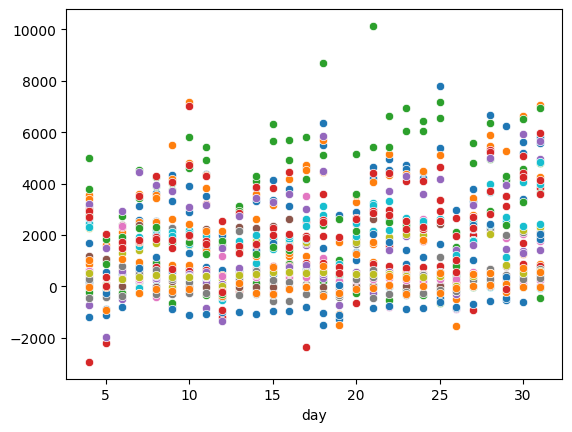

In [203]:
for item in train_x.keys():
  print(item)
  if len(train_x[item]) == 0:
     continue
  train_pool = Pool(train_x[item], train_y[item], cat_features=cat_features)
  cat_model = CatBoostRegressor(verbose=1500,iterations=15000, learning_rate=0.1)
  cat_model.fit(train_pool)
  test_pool = Pool(test_x[test_idx[item]], cat_features=cat_features)
  preds = cat_model.predict(test_pool)
  submission['answer'][test_idx[item]] = preds

  # x=test_x[test_idx[item]]['month']*32 + test_x[test_idx[item]]['day']
  x= test_x[test_idx[item]]['day']
  display(sns.scatterplot(y=preds, x=x))

submission['answer'][submission['answer']<0] = 0
display(submission.head(5))
display(submission.describe())
submission.to_csv('/content/gdrive/MyDrive/data/가격예측/sample_data/groupby_item_corp_no_time.csv', index=False)

In [ ]:
train, test, submission = utils.get_data()
# print(test.head(5))
train_x, train_y, test_x, test_idx = data_processing(train,test)
print(train_x['TG'].head())
print(test_x.head())
print(test_idx['TG'].head())

cat_features = ['corporation', 'location']
for item in train_x.keys():
  train_pool = Pool(train_x[item], train_y[item], cat_features=cat_features)
  cat_model = CatBoostRegressor(verbose=1500,iterations=15000, learning_rate=0.1, has_time=True)
  cat_model.fit(train_pool)
  test_pool = Pool(test_x[test_idx[item]], cat_features=cat_features)
  preds = cat_model.predict(test_pool)
  submission['answer'][test_idx[item]] = preds

  # x=test_x[test_idx[item]]['month']*32 + test_x[test_idx[item]]['day']
  x= test_x[test_idx[item]]['day']
  display(sns.scatterplot(y=preds, x=x))

submission['answer'][submission['answer']<0] = 0
display(submission.head(5))
display(submission.describe())
submission.to_csv('/content/gdrive/MyDrive/data/가격예측/sample_data/hasTime0.1.csv', index=False)

